✅ Accuracy: 0.75

📋 Classification Report:
               precision    recall  f1-score   support

       angry       0.50      1.00      0.67         1
       happy       1.00      0.50      0.67         2
         sad       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



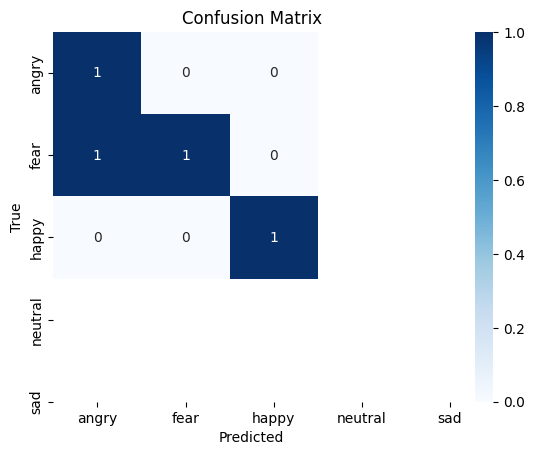

✅ Model saved as emotion_classifier.pkl


## 🔍 Enter your own text to detect emotion

Text(value='', description='Your Text:', layout=Layout(width='70%'), placeholder='Type something here...')

Button(button_style='success', description='Predict Emotion', style=ButtonStyle())

Output()

In [7]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import neattext.functions as nfx
import joblib
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# 📌 Step 2: Sample Dataset (You can replace this with a larger Kaggle dataset)
# 📌 Step 2: Sample Dataset (Updated to improve prediction for exact phrases)
data = {
    "text": [
        "I am so happy today!", 
        "This is terrible and makes me angry", 
        "I feel sad and down", 
        "This is wonderful news", 
        "I am absolutely furious",
        "I am excited to begin",
        "I hate everything about this",
        "I'm scared and anxious",
        "That was hilarious",
        "I feel hopeful and calm",
        "I am feeling sad",
        "I am feeling happy",
        "I am feeling angry",
        "I am happy",   # ✅ added
        "I am sad",     # ✅ added
        "I am angry"    # ✅ added
    ],
    "emotion": [
        "happy", "angry", "sad", "happy", "angry", 
        "happy", "angry", "fear", "happy", "neutral",
        "sad", "happy", "angry",
        "happy", "sad", "angry"  # ✅ corresponding labels
    ]
}

 

df = pd.DataFrame(data)

# 📌 Step 3: Clean Text
df['clean_text'] = df['text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_special_characters)

# 📌 Step 4: Train-Test Split
X = df['clean_text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Build Pipeline
emotion_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# 📌 Step 6: Train Model
emotion_pipeline.fit(X_train, y_train)

# 📌 Step 7: Evaluate Model
y_pred = emotion_pipeline.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 8: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 📌 Step 9: Save Model
joblib.dump(emotion_pipeline, "emotion_classifier.pkl")
print("✅ Model saved as emotion_classifier.pkl")

# 📌 Step 10: Load Model for User Input
loaded_model = joblib.load("emotion_classifier.pkl")

# 📌 Step 11: UI for User Input using ipywidgets
text_input = widgets.Text(
    value='',
    placeholder='Type something here...',
    description='Your Text:',
    layout=widgets.Layout(width='70%')
)

predict_button = widgets.Button(
    description="Predict Emotion",
    button_style='success'
)

output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        user_text = text_input.value
        if user_text.strip() == "":
            display(Markdown("⚠️ **Please enter some text.**"))
            return
        clean_input = nfx.remove_special_characters(nfx.remove_stopwords(user_text))
        prediction = loaded_model.predict([clean_input])[0]
        display(Markdown(f"### 🧠 Predicted Emotion: `{prediction}`"))

predict_button.on_click(on_button_click)

display(Markdown("## 🔍 Enter your own text to detect emotion"))
display(text_input, predict_button, output)